# BL40A2030 Wireless Communication Networks

## Week 4 - Assignment

### Author: Jaime Arturo Álvarez Orgaz

**1. (Propagation effects in wireless transmission) When modeling wireless links, we can cite three main effects: distance-dependent path-loss, slow fading and fast fading.**

(a) Explain with your own words these three effects.

(b) A distance dependent path-loss states a relation between the power of the signal as a function of the distance that the signal have travelled. Plot $P = d^{-\alpha}$ where $\alpha$ is the path-loss exponent. Consider: $1\leq d \leq 5$ for four values of path loss exponends: $\alpha=2, 3, 4, 5$.

(c) What is the impact of $\alpha$ in relation to the interference level experienced by a given receiver at a given distance $d$ from the interferer transmitter?

*Note: In the text, the path-loss exponent is also denoted by $\eta$. In this case, $\alpha$ and $\eta$ refer to the same thing (other authors use even other notations). I prefer to use $\alpha$.*

**2. (Interference models) Explain with your own words the following models and their differences** 

- Collision channel model
- Capture channel model
- Vulnerability circle capture model
- Power capture model


**3. (Physical interference model) Explain with your own words equation (3) from [4]:**

$$ \dfrac{P_i |X_i - X_{R(i)}|^{-\alpha}}{\sigma^2 + \sum_{k \in \mathcal{N}, k\ \neq i} P_k |X_k - X_{R(i)}|^{-\alpha} } \geq \beta_p$$

- Meaning of the variables there.
- Identify the sources of uncertainty on these variables.
- Rewrite here a simplified version of this equation when: Noise and fading are neglected, the transmit power from all transmitters are the same, and the receiver is located at the origin i.e. (0, 0). Which are the possible source of uncertainty in this case?


**4. (Topologies) Draw in the same plot: (a) random network with 200 nodes in a square $10 \times 10$ uniformly distributed in $x$ and $y$ and (b) square grid with $16$ elements. Do you think this is a good model for a [small-cell](https://en.wikipedia.org/wiki/Small_cell) in a cellular network?**


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1.A**

Distance-dependent path loss: It is one of the main propagation effects in wireless transmissions. It models the devilitation of the signal when going form the transmit antenna to the receive antenna.

Slow-fading: Propagation of the signals usually occur through many channels(paths) and multiple replicas of the signal are received by the receiver antenna. This replicas, can combine into a positive or a negative way. The result is a signal received with a rapid envelope fluctuation.

Fast-fading: Large objects can obstruct in the transmission of the signal. This may devilitate it. It is meassured in decibels.

**1.B**

In [ ]:
alpha = range(2,6)
d = range(1,5);

plt.figure(figsize=(14,5))
for i in d:
        prob = [i ** (-j) for j in alpha]
        plt.plot(alpha, prob, label=f'd={d}' )

plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Probability")



**1.C**

The impact of alpha in relation to the interference level experienced by a given receiver at a given distance d from the interferer transmiter is when alpha increases, the probability is lower. The interference is higher at close range.

**2**

**Collission channel model:** The colission channel model will lose all messages because of packet collision.

**Capture channel model:** In the capture channel model if interferences disturb the reception, it may is recieve successfully the packets. It will only successfully receive them under the conditions of vulnerability circle model and power capture model.

**Vulnerability circle capture model:** The elements inside the circle if they collide they will cause an error and there will be a loss. The elements outside the circle do not cause interferences.

**Power capture model:** The power capture model is better than the vulnerability circle because it considers all the interferences of all the active elements

**3.A**

**{(Xi,XR(i)) : i ∈ N}**: Set of transmitter-receiver pairs.

**{Pi}**: Transmit power.

**Xi**: Terminal Xi.

**XR(i)**: Terminal XR(i).

**SINR**: Noise ratio.

**β**: Threshold.

**O^2**: Additive noise power


**3.B**

One of the multiple uncertities of the Physical Interference Model would be that i does not describe the interference relationship between 2 terminal or links. This is not particularly good for constructing interference graphs. Other uncertity would be intereferers located beyond X distance. This interference is ignored when computing the aggregate interference.

**3.C**

The simplified version the equation is the signal to interference Ratio: 

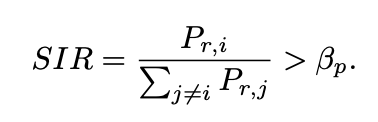

The source of uncertity in this model is when the power doesn't exceed the threshold. 

**4**

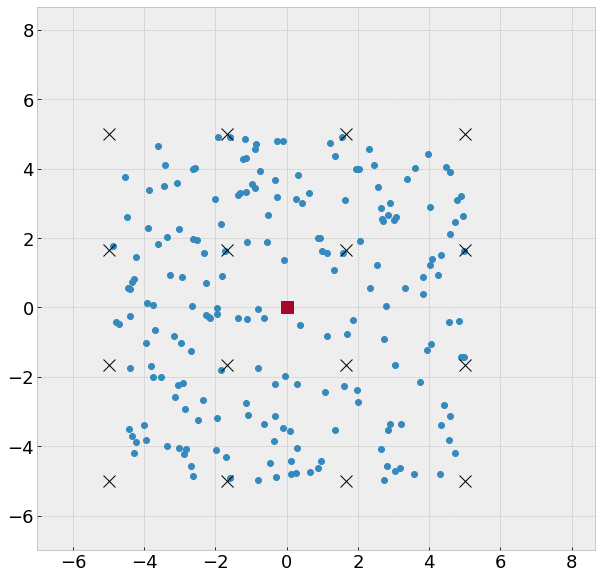

In [4]:
#A

#Network size (square)
L = 10
#Number of nodes
n = 200
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)


#B

#Network size (square)
L = 10
#This is the sqrt of the number
n = 4
#
#Regular distribution in x
position_x_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#Regular distribution in x
position_y_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#
position_x_realization1, position_y_realization1 = np.meshgrid(position_x_realization_aux1, position_y_realization_aux1)
#####
#Regular distribution in x
position_x_realization_aux2 = np.linspace(-L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2, L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 , n) 
#Regular distribution in x
position_y_realization_aux2 = np.linspace(-L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2, L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 , n) 
#
position_x_realization2, position_y_realization2 = np.meshgrid(position_x_realization_aux2, position_y_realization_aux2)


# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization, position_y_realization, 'o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(position_x_realization1, position_y_realization1, 'k x',markersize=12)
plt.xlim(-L/2-2,L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 + 2)
plt.ylim(-L/2-2,L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 + 2)
plt.show()


This model is a good model for small cell networks because of the random distributed nodes in a small area. Small cell networks operate in a range of 10m to a few km and they can handle a few concurrent sessions. Because we don't know where is going to be the highest density of nodes at once, this network model is good for our purpose.